In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, 100).reshape(m, 1)
y = X + np.random.randn(m, 1)

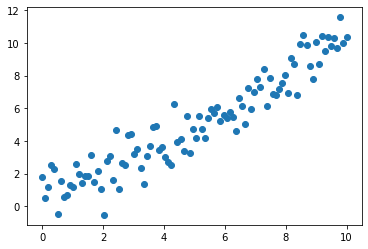

In [15]:
plt.scatter(X, y)

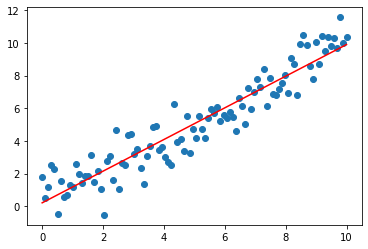

In [16]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='red')

In [17]:
titanic = pd.read_csv('titanic.csv')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier()

In [23]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

(714, 3) (714,)


In [ ]:
model.fit(X, y)
model.score(X, y)

In [ ]:
model.predict(X)


In [ ]:
def survie(model, pclass=3, sex=0, age=20):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [7]:
survie(model)

NameError: name 'survie' is not defined

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
X = iris.data
print(y)
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


NameError: name 'plt' is not defined

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [24]:
from sklearn.model_selection import cross_val_score


In [25]:
cross_val_score(KNeighborsClassifier(5), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9416666666666668

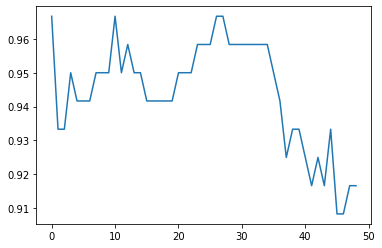

In [26]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [27]:
from sklearn.model_selection import validation_curve

d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


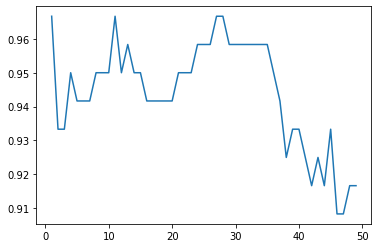

In [28]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_scoree = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_scoree.mean(axis=1))

In [29]:
from sklearn.model_selection import GridSearchCV


In [30]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [31]:
grid.best_score_


0.9666666666666668

In [32]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [33]:
model = grid.best_estimator_

In [34]:
model.score(X_test, y_test)

1.0

In [35]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

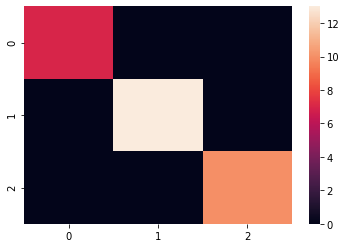

In [36]:
confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))

In [37]:
from sklearn.model_selection import learning_curve


In [38]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=5)
print(N)

[19 38 57 76 96]


<function matplotlib.pyplot.legend(*args, **kwargs)>

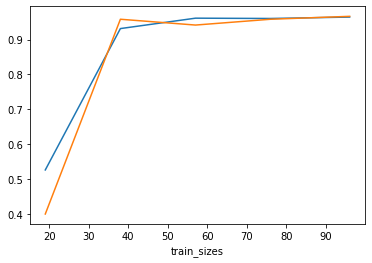

In [39]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend